# Overview
This notebook attempts to detect straggler of MD analysis by plotting RMSD across multiple resources using up to 768 cores. The test script is written by mpi4py and the data file is parsed to represent a histogram of execution time each frame. Data file contains [total size]\s[argument]\s[mean value of each execution time]\s[index]\s[total execution time] where I pick up the last column to display.

### Straggler definition

straggler is a task has high runtime if its time to finish is longer than 1.5 times IQR distance above the third quartile which is $$Q_3+1.5\cdot\text{IQR}$$

### Impact of Stragglers

In [4]:
import plotly
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

This test run was completed with the following resources using up to 768 cores.

In [26]:
entry = { "bridges": [ 28, 112, 224, 448,896],
        "comet": [24, 96, 192, 384, 768],
        "wrangler": [48, 96, 192, 384, 768] }
n_frames = 2512200

In [27]:
df = {}
df_throughput = {}
for resource_name, core_list in entry.items():
    for num_cores in core_list:
        df_tmp = pd.read_csv(open("straggler/{}.{}.data.txt".format(resource_name, num_cores)), sep=" ", header=None)
        df[resource_name + "." + str(num_cores)] = df_tmp[4]
        df_throughput[resource_name + "." + str(num_cores)] = n_frames / num_cores / df_tmp[4]

In [55]:
df = pd.DataFrame.from_dict(df)

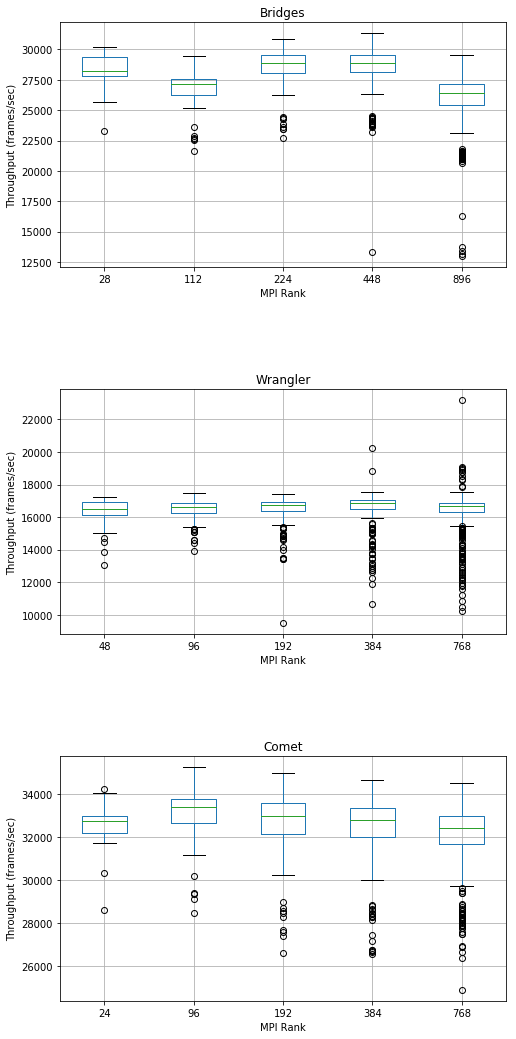

In [54]:
plt.figure()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,18))
fig.subplots_adjust(hspace=.5)
row = 0
for resource_name, core_list in entry.items():
    columns = []
    for num_cores in core_list:
        columns.append("{}.{}".format(resource_name, num_cores))
    ax = df_throughput.boxplot(column=columns, ax=axes[row])
    ax.set_xticklabels(core_list)
    ax.set_title(resource_name.capitalize())
    ax.set_xlabel("MPI Rank")
    ax.set_ylabel("Throughput (frames/sec)")
    row += 1
plt.show()

### Reference

- Anomaly detection: A survey, 	Varun Chandola et al, https://dl.acm.org/citation.cfm?id=1541882
- Characterizing output bottlenecks in a supercomputer, Bing Xie et al, https://ieeexplore.ieee.org/document/6468446
- Multi-Task Learning for Straggler Avoiding Predictive Job Scheduling, Neeraja J. Yadwadkar et al, http://jmlr.org/papers/volume17/15-149/15-149.pdf